# 워드 클라우드 및 자연어 처리

In [1]:
# import nltk 
# # punkt, stopwords download
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [199]:
tokens = okt.nouns(df_tofluxfull[df_tofluxfull.Contents.str.contains('제주')].Contents.str)
tokens[:10]

AssertionError: phrase input should be string, not <class 'pandas.core.strings.accessor.StringMethods'>

In [196]:
import re
new_tokens =[]
for token in tokens:
    new_token = re.sub('[^가-힣 ]', '', token)
    if new_token:                       # ''는 포함시키지 말 것
        new_tokens.append(new_token)

NameError: name 'tokens' is not defined

### Use lib

In [137]:
import pandas as pd
import numpy as np
import copy
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re, joblib
import konlpy
from konlpy.tag import Okt 
okt = Okt()
import string
import threading

## Use Data

In [42]:
os.chdir('/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data/')

In [44]:
ls

 elecafe.csv
'pietest (df1798e6) (d8200025) (d8200025).png'
'pietest (df1798e6) (df1798e6) (df1798e6) (df1798e6).png'
 관련키워드.csv
'긍부정 (4de45444) (4de45444).png'
 네이버-제주전기차후기통합.csv
 느영나영전기차크롤링.csv
 느영나영전기차크롤링.csv.part
'본문 검색 결과_2022.03.06.xlsx'
'전기차 동호회 전기차크롤링.csv'
 전기차관련검색어인기순.csv
 전기차관심도지역.csv
 전기차관심증가.csv
 전기차키워드관련주제인기순.csv
 전체본문의댓글결과_2022.03.06.xlsx
 제사모크롤링.csv
 투플럭스sjeju.csv


In [45]:
df_naver= pd.read_csv('네이버-제주전기차후기통합.csv')

In [9]:
df = pd.read_csv('/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data/elecafe.csv')

In [107]:
df_toflux= pd.read_csv('본문 검색 결과_2022.03.06.xlsx')

In [124]:
df_tofluxfull= pd.read_excel('/home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis/본문 검색 결과_2022.03.06.xlsx')

## 분석

In [126]:
df_tofluxfull.Contents

0         ▶ 아이오닉5 휠베이스 3000의 가치_x000D_\n_x000D_\n서비스센터 갔...
1         ▶ 현대차 아이오닉5 vs 테슬라 모델Y, 뭘 살까요?_x000D_\n_x000D_...
2         ▶ (완판) 2020.5 롯데렌터카 신차장! 테슬라프로모션 105대 공지드립니다. ...
3         ▶ 코나ev 충전중 화재로 전손 됬습니다_x000D_\n_x000D_\n안녕하세요,...
4         ▶ 전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요...
                                ...                        
394815    ▶ C40 대기순번 문의_x000D_\n_x000D_\n* 관련된 주제에 대해 미리...
394816    ▶ 와.. 진짜 미­쳣나봐요 ㅋㅋ_x000D_\n_x000D_\n쿠­팡이 드디어 미...
394817    ▶ 니로 ev 회생제동 질문_x000D_\n_x000D_\n안녕하세요 니로 ev 중...
394818    ▶ 가입인사 드립니다_x000D_\n_x000D_\n1. 자기소개 : 안녕하세요~e...
394819    ▶ 취소차 문의드립니다._x000D_\n_x000D_\n* 관련된 주제에 대해 미리...
Name: Contents, Length: 394820, dtype: object

In [138]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [292]:
df_tofluxfull.ContentType.value_counts()

P    394820
Name: ContentType, dtype: int64

In [300]:
df_제주키워드=df_tofluxfull[df_tofluxfull.Contents.str.contains('제주')]

In [301]:
df_제주키워드

,Unnamed: 0,classCode,필터명,수집채널,카페명,제목,작성자,작성시간,조회수,댓글수,...,Url,Contents,ChannelCode,ContentType,PostNo,Sno,Og_ImageUrl,Og_Description,grpNo,SeqIdx
4,NaN,-99,NaN,네이버카페,전기차동호회,전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요~(...,희망I쏘울I서울,2020-05-13 15:19:00,2461,438,...,https://cafe.naver.com/allfm01/463393,▶ 전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요...,1002,P,55173735,0,NaN,NaN,1116,55173735
51,NaN,-99,NaN,네이버카페,전기차동호회,손예진 x EV6 ..?,아하첼시I쏘울I제주,2021-07-02 13:40:00,1327,12,...,https://cafe.naver.com/allfm01/636063,▶ 손예진 x EV6 ..?_x000D_\n_x000D_\n현 시각 제주 입니다. ...,1002,P,95964586,0,NaN,NaN,1116,95964586
660,NaN,-99,NaN,네이버카페,전기차동호회,제주공항 어메이징 하네요,내아들천I코3ev6I대구,2022-02-17 11:06:00,798,7,...,https://cafe.naver.com/allfm01/786596,▶ 제주공항 어메이징 하네요_x000D_\n_x000D_\n제주공항에 급속충전기가 ...,1002,P,120924140,0,NaN,NaN,1116,120924140
751,NaN,-99,NaN,네이버카페,전기차동호회,테슬라코리아 채용공고에 등장하고 있는 도시들....,데얀I모델3I김포,2021-01-12 15:23:00,773,5,...,https://cafe.naver.com/allfm01/550940,▶ 테슬라코리아 채용공고에 등장하고 있는 도시들...._x000D_\n_x000D_...,1002,P,79505593,0,NaN,NaN,1116,79505593
857,NaN,-99,NaN,네이버카페,전기차동호회,코나 급발진 실화냐,션볼로I코나I성남,2021-03-04 21:15:00,753,13,...,https://cafe.naver.com/allfm01/577259,▶ 코나 급발진 실화냐_x000D_\n_x000D_\n주차 차단기 뚫고 쾅…전기차도...,1002,P,83592522,0,NaN,NaN,1116,83592522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394545,NaN,-99,NaN,네이버카페,전기차동호회,전기차를 2대 가지고있습니다.,한동이네,2020-11-22 11:55:00,0,0,...,https://cafe.naver.com/allfm01/532101,▶ 전기차를 2대 가지고있습니다._x000D_\n_x000D_\n1. 자기소개 : ...,1002,P,74397383,0,NaN,NaN,1116,74397383
394581,NaN,-99,NaN,네이버카페,전기차동호회,안녕하세요,주스스I제주,2020-10-16 02:29:00,0,0,...,https://cafe.naver.com/allfm01/518497,▶ 안녕하세요_x000D_\n_x000D_\n1. 자기소개 : 안녕하세요 2 한글별...,1002,P,70054720,0,NaN,NaN,1116,70054720
394644,NaN,-99,NaN,네이버카페,전기차동호회,가입인사,대담ㅣ아이오닉5제주,2021-10-26 09:04:00,0,0,...,https://cafe.naver.com/allfm01/710855,▶ 가입인사_x000D_\n_x000D_\n1. 자기소개 : 2. 지역 : 제주시 ...,1002,P,111591198,0,NaN,NaN,1116,111591198
394717,NaN,-99,NaN,네이버카페,전기차동호회,제주도에서 소화기 어디서 사죠?,제로스IEV6I제주,2021-12-15 15:07:00,0,0,...,https://cafe.naver.com/allfm01/743681,▶ 제주도에서 소화기 어디서 사죠?_x000D_\n_x000D_\n굳이 택배로 안 ...,1002,P,116561097,0,NaN,NaN,1116,116561097


In [251]:
df_제주키워드

,Unnamed: 0,classCode,필터명,수집채널,카페명,제목,작성자,작성시간,조회수,댓글수,...,Url,Contents,ChannelCode,ContentType,PostNo,Sno,Og_ImageUrl,Og_Description,grpNo,SeqIdx
4,NaN,-99,NaN,네이버카페,전기차동호회,전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요~(...,희망I쏘울I서울,2020-05-13 15:19:00,2461,438,...,https://cafe.naver.com/allfm01/463393,▶ 전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요...,1002,P,55173735,0,NaN,NaN,1116,55173735
51,NaN,-99,NaN,네이버카페,전기차동호회,손예진 x EV6 ..?,아하첼시I쏘울I제주,2021-07-02 13:40:00,1327,12,...,https://cafe.naver.com/allfm01/636063,▶ 손예진 x EV6 ..?_x000D_\n_x000D_\n현 시각 제주 입니다. ...,1002,P,95964586,0,NaN,NaN,1116,95964586
660,NaN,-99,NaN,네이버카페,전기차동호회,제주공항 어메이징 하네요,내아들천I코3ev6I대구,2022-02-17 11:06:00,798,7,...,https://cafe.naver.com/allfm01/786596,▶ 제주공항 어메이징 하네요_x000D_\n_x000D_\n제주공항에 급속충전기가 ...,1002,P,120924140,0,NaN,NaN,1116,120924140
751,NaN,-99,NaN,네이버카페,전기차동호회,테슬라코리아 채용공고에 등장하고 있는 도시들....,데얀I모델3I김포,2021-01-12 15:23:00,773,5,...,https://cafe.naver.com/allfm01/550940,▶ 테슬라코리아 채용공고에 등장하고 있는 도시들...._x000D_\n_x000D_...,1002,P,79505593,0,NaN,NaN,1116,79505593
857,NaN,-99,NaN,네이버카페,전기차동호회,코나 급발진 실화냐,션볼로I코나I성남,2021-03-04 21:15:00,753,13,...,https://cafe.naver.com/allfm01/577259,▶ 코나 급발진 실화냐_x000D_\n_x000D_\n주차 차단기 뚫고 쾅…전기차도...,1002,P,83592522,0,NaN,NaN,1116,83592522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394545,NaN,-99,NaN,네이버카페,전기차동호회,전기차를 2대 가지고있습니다.,한동이네,2020-11-22 11:55:00,0,0,...,https://cafe.naver.com/allfm01/532101,▶ 전기차를 2대 가지고있습니다._x000D_\n_x000D_\n1. 자기소개 : ...,1002,P,74397383,0,NaN,NaN,1116,74397383
394581,NaN,-99,NaN,네이버카페,전기차동호회,안녕하세요,주스스I제주,2020-10-16 02:29:00,0,0,...,https://cafe.naver.com/allfm01/518497,▶ 안녕하세요_x000D_\n_x000D_\n1. 자기소개 : 안녕하세요 2 한글별...,1002,P,70054720,0,NaN,NaN,1116,70054720
394644,NaN,-99,NaN,네이버카페,전기차동호회,가입인사,대담ㅣ아이오닉5제주,2021-10-26 09:04:00,0,0,...,https://cafe.naver.com/allfm01/710855,▶ 가입인사_x000D_\n_x000D_\n1. 자기소개 : 2. 지역 : 제주시 ...,1002,P,111591198,0,NaN,NaN,1116,111591198
394717,NaN,-99,NaN,네이버카페,전기차동호회,제주도에서 소화기 어디서 사죠?,제로스IEV6I제주,2021-12-15 15:07:00,0,0,...,https://cafe.naver.com/allfm01/743681,▶ 제주도에서 소화기 어디서 사죠?_x000D_\n_x000D_\n굳이 택배로 안 ...,1002,P,116561097,0,NaN,NaN,1116,116561097


In [252]:
df_제주키워드.reset_index(inplace=True)

In [253]:
df_제주키워드

,index,Unnamed: 0,classCode,필터명,수집채널,카페명,제목,작성자,작성시간,조회수,...,Url,Contents,ChannelCode,ContentType,PostNo,Sno,Og_ImageUrl,Og_Description,grpNo,SeqIdx
0,4,NaN,-99,NaN,네이버카페,전기차동호회,전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요~(...,희망I쏘울I서울,2020-05-13 15:19:00,2461,...,https://cafe.naver.com/allfm01/463393,▶ 전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요...,1002,P,55173735,0,NaN,NaN,1116,55173735
1,51,NaN,-99,NaN,네이버카페,전기차동호회,손예진 x EV6 ..?,아하첼시I쏘울I제주,2021-07-02 13:40:00,1327,...,https://cafe.naver.com/allfm01/636063,▶ 손예진 x EV6 ..?_x000D_\n_x000D_\n현 시각 제주 입니다. ...,1002,P,95964586,0,NaN,NaN,1116,95964586
2,660,NaN,-99,NaN,네이버카페,전기차동호회,제주공항 어메이징 하네요,내아들천I코3ev6I대구,2022-02-17 11:06:00,798,...,https://cafe.naver.com/allfm01/786596,▶ 제주공항 어메이징 하네요_x000D_\n_x000D_\n제주공항에 급속충전기가 ...,1002,P,120924140,0,NaN,NaN,1116,120924140
3,751,NaN,-99,NaN,네이버카페,전기차동호회,테슬라코리아 채용공고에 등장하고 있는 도시들....,데얀I모델3I김포,2021-01-12 15:23:00,773,...,https://cafe.naver.com/allfm01/550940,▶ 테슬라코리아 채용공고에 등장하고 있는 도시들...._x000D_\n_x000D_...,1002,P,79505593,0,NaN,NaN,1116,79505593
4,857,NaN,-99,NaN,네이버카페,전기차동호회,코나 급발진 실화냐,션볼로I코나I성남,2021-03-04 21:15:00,753,...,https://cafe.naver.com/allfm01/577259,▶ 코나 급발진 실화냐_x000D_\n_x000D_\n주차 차단기 뚫고 쾅…전기차도...,1002,P,83592522,0,NaN,NaN,1116,83592522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,394545,NaN,-99,NaN,네이버카페,전기차동호회,전기차를 2대 가지고있습니다.,한동이네,2020-11-22 11:55:00,0,...,https://cafe.naver.com/allfm01/532101,▶ 전기차를 2대 가지고있습니다._x000D_\n_x000D_\n1. 자기소개 : ...,1002,P,74397383,0,NaN,NaN,1116,74397383
4979,394581,NaN,-99,NaN,네이버카페,전기차동호회,안녕하세요,주스스I제주,2020-10-16 02:29:00,0,...,https://cafe.naver.com/allfm01/518497,▶ 안녕하세요_x000D_\n_x000D_\n1. 자기소개 : 안녕하세요 2 한글별...,1002,P,70054720,0,NaN,NaN,1116,70054720
4980,394644,NaN,-99,NaN,네이버카페,전기차동호회,가입인사,대담ㅣ아이오닉5제주,2021-10-26 09:04:00,0,...,https://cafe.naver.com/allfm01/710855,▶ 가입인사_x000D_\n_x000D_\n1. 자기소개 : 2. 지역 : 제주시 ...,1002,P,111591198,0,NaN,NaN,1116,111591198
4981,394717,NaN,-99,NaN,네이버카페,전기차동호회,제주도에서 소화기 어디서 사죠?,제로스IEV6I제주,2021-12-15 15:07:00,0,...,https://cafe.naver.com/allfm01/743681,▶ 제주도에서 소화기 어디서 사죠?_x000D_\n_x000D_\n굳이 택배로 안 ...,1002,P,116561097,0,NaN,NaN,1116,116561097


### 전처리 및 분석

In [134]:
df.head(3)

,제목,내용,댓글,유형,조회수,작성날짜,월별,카페명,년별
0,봉고3더블캡,"※ 보다 투명하고, 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요. ※ \n...",가격이 궁금해요..^^\n얼마인가요ㅡ\n,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서. 렌트카 알아보고 있어요. 육지에...,요즘 전기차가 대세기도 하지만 가스값 장난아니게 올랏어요...또한 한달살기라면 자차...,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022
2,더 뉴 아이오닉 일렉트릭N 20년형 흰색7만 현대스마트센스 l추가 완전무사고/믿고사...,★ 차량 정보 ★\n\n▶▷모델명 : 더 뉴 아이오닉 일렉트릭 N 전기차\n\n▶▷...,내용없음,중고자동차 매물,62,2022.03.16.,2022.03,제사모,2022


In [260]:
userwant = df_제주키워드.Contents.copy()
userwant.dropna(inplace=True)
userwant.reset_index(inplace=True,drop=True)
userwant_list=userwant.values


sum_list = []
for i in range(len(userwant_list)):
    sum_list+=userwant_list[i].replace(string.punctuation,'').split(' ')
len(sum_list)


1290089

In [254]:
df_제주키워드['Contents']=df_제주키워드.Contents.apply(lambda x : re.sub('[^가-힣]',' ',x))

/tmp/ipykernel_234361/225812890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_제주키워드['Contents']=df_제주키워드.Contents.apply(lambda x : re.sub('[^가-힣]',' ',x))


In [257]:
df_제주키워드.Contents[0]

'  전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요  만약에 제가 국민청원게시판에 충전요금 원복철회 관련된 글을 게시하면 호응해줄분이 얼마나 될까 궁금해 여쭤봅니다                  작년 이맘때 전기차충전요금 원복에 대한 얘기가 많아 어수선할때        우리회원이  만이 안되었을 시점이었던걸로 기억합니다        국민 친환경차라 나라에서     년당시 나라에서      지자체에서     비공용충전설비 구축비용   을 받았었는데         그전전해에는 구축비용이    이어서 캐노피까지 한걸로 알고 있습니다        작년 한해 전기충전요금    감면해서 얻은 손실액이 겨우    억원이란 기사를 읽어본적 있습니다        사실상 국내뿐만 아니라 유럽선진국중 어느나라는      년부터는 아예 내연기관차량을 생산하지않겠다라고 발표한나라가 있죠        노르웨이는 전국에서 내연기관차량 운행을 아예 못하는 것으로 알고 있습니다        국내서도 상당한 친환경차 구매촉진을 위한 당근책을 내놓는 이유는 탄소배출권을 얻기위함도 있겠으나        중국발 미세먼지    국내유발   중        국내유발    를 줄여보고자 많은 노력을 하고 있는것으로 알고 있습니다        장황하게 얘기가 길어졌는데        우리회원수가 약   만정도 되었으니 한번 시도해볼까하는데        여러회원님들의 의견청취를 하고 싶습니다        현재      원은 휘발유대비  분의  이지만             원으로 윈복되면    수준과 큰차이가 없게됩니다        그렇게되면  회충전시  시간이상 기다려야 하는 수고를 할 이유가 상쇄되는 것이죠        지금도 많은경우에 있어           가까이 비공용충전기가 없어 공용충전기를 이용할때 이른새벽혹은 자정임박한 시간이 아니고선        지자체간 다른듯 싶은데   분컷이곳도 있고  시간컷인곳도 있어 평균적으로 제차까지 충전하려면  시간  분은 기다려야

In [238]:
# import re
# new_tokens =[]
# for token in tokens:
#     new_token = re.sub('[^가-힣 ]', '', df_제주키워드.Contents[0])
#     if new_token:                       # ''는 포함시키지 말 것
#         new_tokens.append(new_token)

In [239]:
new_tokens

[' 전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요만약에 제가 국민청원게시판에 충전요금 원복철회 관련된 글을 게시하면 호응해줄분이 얼마나 될까 궁금해 여쭤봅니다작년 이맘때 전기차충전요금 원복에 대한 얘기가 많아 어수선할때우리회원이 만이 안되었을 시점이었던걸로 기억합니다국민 친환경차라 나라에서 년당시 나라에서 지자체에서  비공용충전설비 구축비용을 받았었는데 그전전해에는 구축비용이 이어서 캐노피까지 한걸로 알고 있습니다작년 한해 전기충전요금 감면해서 얻은 손실액이 겨우 억원이란 기사를 읽어본적 있습니다사실상 국내뿐만 아니라 유럽선진국중 어느나라는 년부터는 아예 내연기관차량을 생산하지않겠다라고 발표한나라가 있죠노르웨이는 전국에서 내연기관차량 운행을 아예 못하는 것으로 알고 있습니다국내서도 상당한 친환경차 구매촉진을 위한 당근책을 내놓는 이유는 탄소배출권을 얻기위함도 있겠으나중국발 미세먼지 국내유발중국내유발 를 줄여보고자 많은 노력을 하고 있는것으로 알고 있습니다장황하게 얘기가 길어졌는데우리회원수가 약 만정도 되었으니 한번 시도해볼까하는데여러회원님들의 의견청취를 하고 싶습니다현재 원은 휘발유대비 분의 이지만원으로 윈복되면 수준과 큰차이가 없게됩니다그렇게되면 회충전시 시간이상 기다려야 하는 수고를 할 이유가 상쇄되는 것이죠지금도 많은경우에 있어가까이 비공용충전기가 없어 공용충전기를 이용할때 이른새벽혹은 자정임박한 시간이 아니고선지자체간 다른듯 싶은데 분컷이곳도 있고 시간컷인곳도 있어 평균적으로 제차까지 충전하려면 시간분은 기다려야 하더군요이렇게 불편을 감수하는 이유는 효율 즉 우리가말하는 전비 연비 아니겠습니까제주살때 비공용충전기로 월정도 주행해도월 원원 내었는데이제 급속만해서 월 도 못주행하는데 만원정도 들어가더군요이것이 년월이후에는 만원내게된다는것이잖아요톨비할인도 없어지고 공영주차장할인도 없어질것이고그렇게되면 자동차 평균운행기간이 정확히는 모르지만 년정도 되는것으로 알고 있는데전기차를 선택한 댓가로 년간 각종불편한 댓가를 치뤄야 한

In [203]:
text_cafe=str(df_tofluxfull[df_tofluxfull.Contents.str.contains('제주')].Contents)
tokens = okt.nouns(text_cafe)
tokens

['전기차',
 '충전',
 '요금',
 '복및',
 '조속',
 '충전',
 '인프라',
 '확충',
 '대한',
 '국민',
 '청원',
 '진행',
 '손예진',
 '현',
 '시각',
 '제주',
 '제주',
 '공항',
 '어메이징',
 '공항',
 '급속',
 '충전기',
 '테슬라',
 '코리아',
 '채용',
 '공고',
 '등장',
 '도시',
 '코',
 '급발진',
 '실화',
 '주차',
 '차단기',
 '쾅',
 '전기차',
 '전기차',
 '자기',
 '소개',
 '자기',
 '소개',
 '한글',
 '별',
 '가입',
 '인사',
 '자기',
 '소개',
 '지역',
 '제주시',
 '제주도',
 '소화기',
 '굳이',
 '택배',
 '안',
 '자기',
 '소개',
 '저',
 '제주',
 '살']

In [207]:
import re
new_tokens =[]
for token in tokens:
    new_token = re.sub('[^가-힣 ]', '', token)
    if new_token:                       # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [208]:
new_tokens

['전기차',
 '충전',
 '요금',
 '복및',
 '조속',
 '충전',
 '인프라',
 '확충',
 '대한',
 '국민',
 '청원',
 '진행',
 '손예진',
 '현',
 '시각',
 '제주',
 '제주',
 '공항',
 '어메이징',
 '공항',
 '급속',
 '충전기',
 '테슬라',
 '코리아',
 '채용',
 '공고',
 '등장',
 '도시',
 '코',
 '급발진',
 '실화',
 '주차',
 '차단기',
 '쾅',
 '전기차',
 '전기차',
 '자기',
 '소개',
 '자기',
 '소개',
 '한글',
 '별',
 '가입',
 '인사',
 '자기',
 '소개',
 '지역',
 '제주시',
 '제주도',
 '소화기',
 '굳이',
 '택배',
 '안',
 '자기',
 '소개',
 '저',
 '제주',
 '살']

In [259]:
new_tokensplt = nltk.Text(df_제주키워드['Contents'], name='내용')
# plt.figure(figsize=(15,6))
new_tokensplt.plot(50)
plt.show()
# plt.savefig('빈도수파악.png')

RuntimeError: In draw_glyphs_to_bitmap: Could not convert glyph to bitmap (error code 0x62)

<Figure size 432x288 with 1 Axes>

In [214]:
data = new_tokensplt.vocab().most_common(300)
data

[('자기', 4),
 ('소개', 4),
 ('전기차', 3),
 ('제주', 3),
 ('충전', 2),
 ('공항', 2),
 ('요금', 1),
 ('복및', 1),
 ('조속', 1),
 ('인프라', 1),
 ('확충', 1),
 ('대한', 1),
 ('국민', 1),
 ('청원', 1),
 ('진행', 1),
 ('손예진', 1),
 ('현', 1),
 ('시각', 1),
 ('어메이징', 1),
 ('급속', 1),
 ('충전기', 1),
 ('테슬라', 1),
 ('코리아', 1),
 ('채용', 1),
 ('공고', 1),
 ('등장', 1),
 ('도시', 1),
 ('코', 1),
 ('급발진', 1),
 ('실화', 1),
 ('주차', 1),
 ('차단기', 1),
 ('쾅', 1),
 ('한글', 1),
 ('별', 1),
 ('가입', 1),
 ('인사', 1),
 ('지역', 1),
 ('제주시', 1),
 ('제주도', 1),
 ('소화기', 1),
 ('굳이', 1),
 ('택배', 1),
 ('안', 1),
 ('저', 1),
 ('살', 1)]

In [261]:
len(data)

46

In [216]:
word_list2 = [data[i][0] for i in range(len(data))]

In [217]:
word_list2

['자기',
 '소개',
 '전기차',
 '제주',
 '충전',
 '공항',
 '요금',
 '복및',
 '조속',
 '인프라',
 '확충',
 '대한',
 '국민',
 '청원',
 '진행',
 '손예진',
 '현',
 '시각',
 '어메이징',
 '급속',
 '충전기',
 '테슬라',
 '코리아',
 '채용',
 '공고',
 '등장',
 '도시',
 '코',
 '급발진',
 '실화',
 '주차',
 '차단기',
 '쾅',
 '한글',
 '별',
 '가입',
 '인사',
 '지역',
 '제주시',
 '제주도',
 '소화기',
 '굳이',
 '택배',
 '안',
 '저',
 '살']

In [188]:
word_list = []

for i in range(0,len(data)):
    word_list.append(data[i][0])

In [165]:
data[0][0]

':'

In [194]:
word_list2

[':',
 '?',
 '전기차',
 '정회원',
 '▶',
 '_x000D_\n',
 '1',
 '-',
 '5',
 '제주',
 '및',
 '*',
 '수',
 '지역',
 '4',
 '하고',
 '3',
 '2',
 '있는',
 '제주도',
 '6',
 '있습니다.',
 '2.',
 '7',
 '3.',
 '차량',
 '보조금',
 '0',
 '말씀',
 '관심있는',
 '/',
 '싶으신',
 '한글별명의',
 '가입계기',
 '뜻',
 '자기소개',
 '24시간',
 ',',
 '여부',
 '실버회원',
 '8,800원),',
 '배터리',
 '더',
 '잘',
 '많이',
 '코나',
 '신규',
 '충전',
 '후',
 '아이오닉5',
 '아이오닉',
 '멤버',
 '등',
 '골드회원',
 '합니다.',
 '대해',
 '보유하고',
 '전기차를',
 '차량사진',
 '경상남도',
 '또는',
 '충전기',
 '바랍니다.',
 '1.',
 '미리',
 '좀',
 '경상북도',
 '경우',
 '제가',
 '너무',
 '4.',
 '100kW급',
 '(보유/계약',
 '여부)',
 '현재',
 '한',
 '질문',
 '내용',
 '테슬라',
 '최초',
 '관련된',
 '카페내',
 '주차장',
 '경기도',
 '보조금을',
 '5.',
 '검색해',
 '급속',
 '종류,',
 '판매자',
 '주제에',
 '보셨습니까?',
 '없음',
 '8,000원),',
 '제주시',
 '보유/계약/미보유',
 '.',
 '\u3000',
 '10',
 '연락처',
 '전라남도',
 '많은',
 '제주도에서',
 'VIP회원',
 '정도',
 '것',
 '시',
 '12',
 '다른',
 '없이',
 '6.',
 '8',
 '포함',
 '구매',
 '11',
 '정보',
 '가입인사',
 '성명,',
 '니로',
 '입니다.',
 '1회',
 '다시',
 '차',
 '7.',
 '다',
 '강원도',
 '9',
 '충청남도',
 '받은',
 '이',
 '전기차

In [195]:
stop_words = '''
 '?',
 '전기차',
 '정회원',
 '▶',
 '_x000D_\n',
 '1',
 '-',
 '5',
 '제주',
 '및',
 '*',
 '수',
 '지역',
 '4',
 '하고',
 '3',
 '2',
 '있는',
 '제주도',
 '6',
 '있습니다.',
 '2.',
 '7',
 '3.',
'''
stop_list = stop_words.split()

''' new_token_list = []
for token in new_tokens:
    if token not in stop_list:
        new_token_list.append(token)
new_tokens = new_token_list '''
new_tokens = [token for token in new_tokens if token not in stop_list]

NameError: name 'new_tokens' is not defined

## 워드클라우드

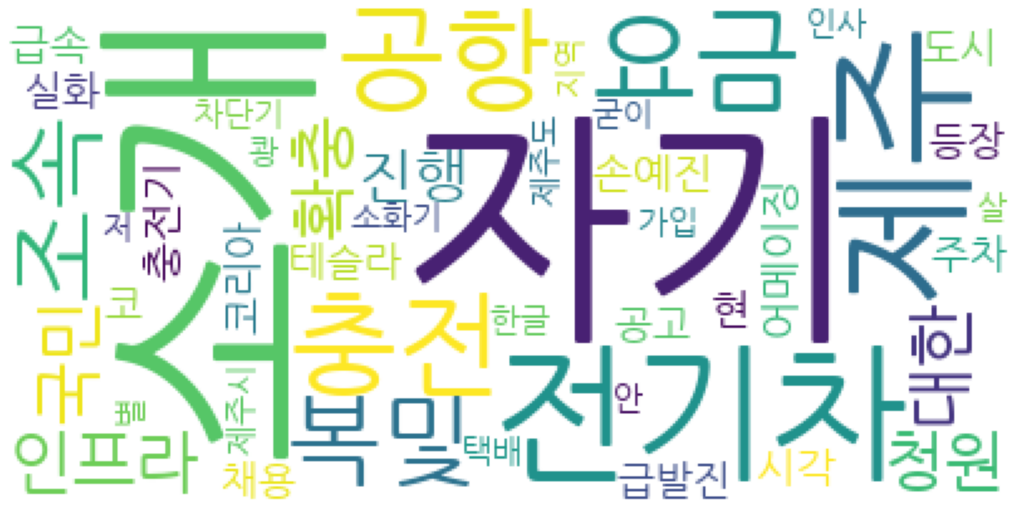

<Figure size 432x288 with 0 Axes>

In [219]:
wc = WordCloud(
    font_path='NanumGothic.ttf',
    relative_scaling=0.00001,
    background_color='white'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(18,12))
plt.imshow(wc)
plt.axis('off')
plt.show()
plt.savefig('elc_usewordcloud.png')

In [113]:
from konlpy.tag import Okt 

In [273]:
df_제주키워드.Contents[6]

'  약   일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다     년 신년맞아 전기차구매를 고려하는 신입회원님들이 보시면 좋을것 같아 게시합니다                 전기차로 바꾼후 높아진 삶의 만족도    일 운행후기        아래글은 지난     년  월   일 전기차 쏘울을 구매후 약  년간 전기차를 운행하면서 적은 후기를         약   일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다            년 신년을 맞이하여 전기차구매를 고려하는 신입회원들께서 보시면 좋을것 같습니다         다만  분이상 읽어야 하는 짧지않은 글이니         긴글 읽으시기 싫으신분은 뒤로가기 하셔요           전기차로 바꾼후 높아진 삶의 만족도         저는 지난     년  월   일 경 곽지에 있는 기독교 관련 캠프 참여차 생애 처음 제주도 땅을 밟았습니다        심히 전 직장에서 받은 과다한 스트레스로 심신이 피폐해져 자살 충동이 극심했고 삶의 의지도 없었을 때        지인 목사님의 권유로 함께 참여하였습니다        마지막 날 심신이 다소 회복됐을 때        집으로 급히 돌아갈 이유가 꼭 있지 않다면        얘기를 해놓을 테니 좀 더 머물라는 주강사님의 배려로        캠프 숙소로 있었던 곽지 수양관에서 약   일을 더 머물 수 있었습니다        저렴한 가격이라지만 하루 숙박요금       식비       중 식비는 받지 않고 숙박요금만 받아서 그나마 머물러 있을 수 있었지만         월  일 이후에는 수양관이 각종 행사로 방에 여유가 없다 하여        급히 숙소를 알아봐야 했습니다         경제적으로 윤택하진 않았지만 그동안 저축해둔 것도 있고 해서         당장 일을 해야 하는 상황은 아니었기에         한 달 살이 방을 알아보는데 터무니없게 비싸게 느껴졌습니다         자취를 해보지 않은 저로서는 하루에 한 끼 이상은

In [ ]:
df_제주키워드[df_제주키워드.평가=='P'].Contensts